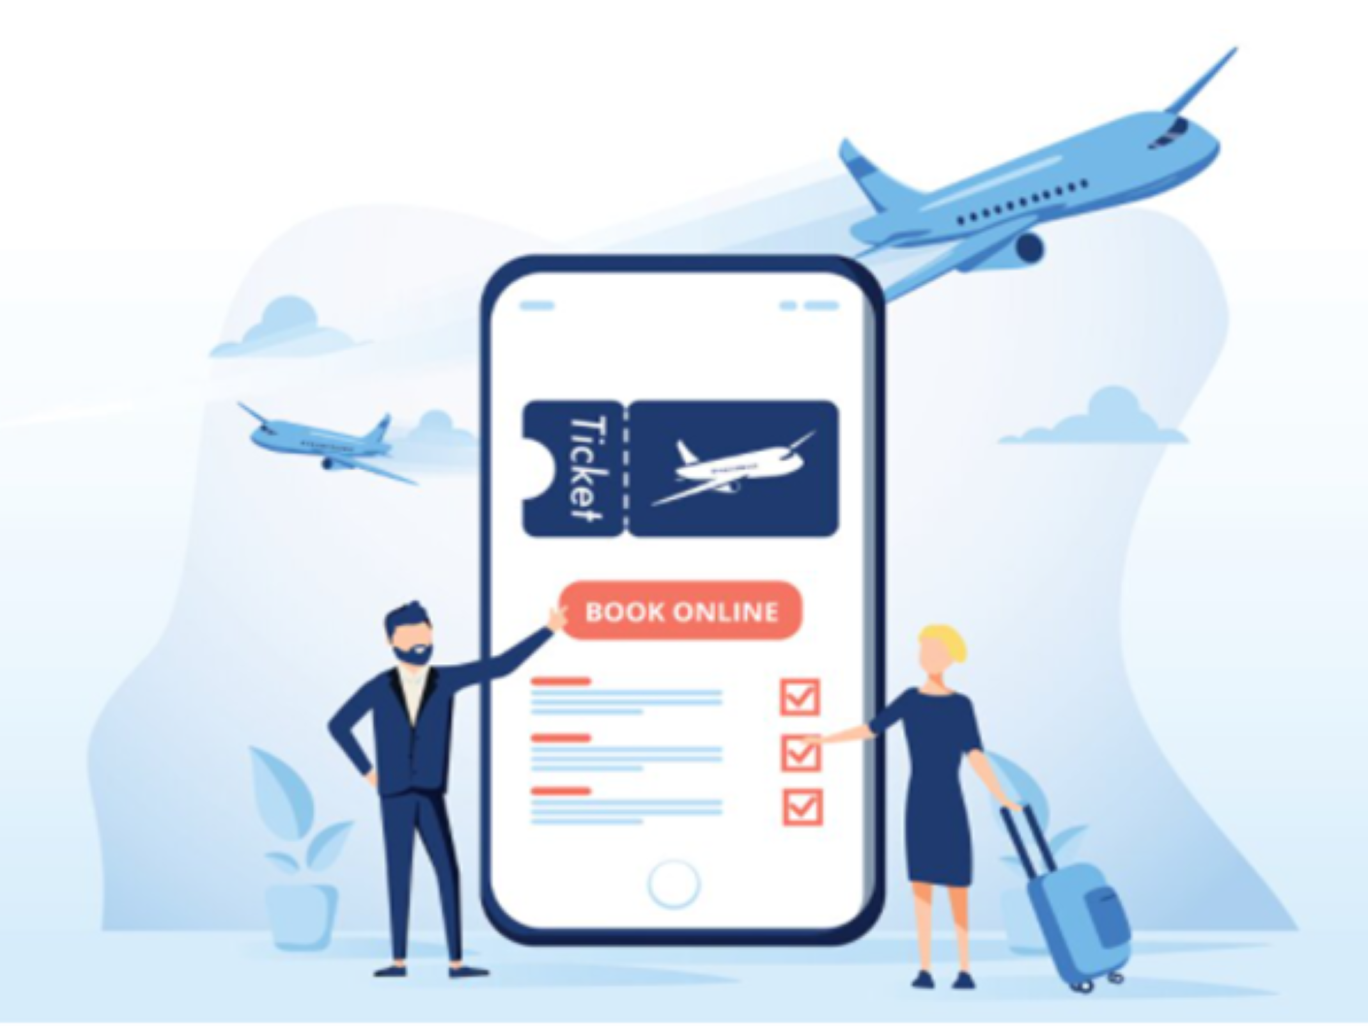

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the dataset
df = pd.read_csv("Flight_Booking.csv")

In [ ]:
#Check the head of the dataset
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Removing the unnecessary column 'Unnamed:0'
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Check the shape of the dataset
df.shape

(300153, 11)

In [ ]:
#Check the column types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
#Check the statistical info of the dataset
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
#Check the missing values in the dataset
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#Check for duplicates in the dataset
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


# Data Visualization

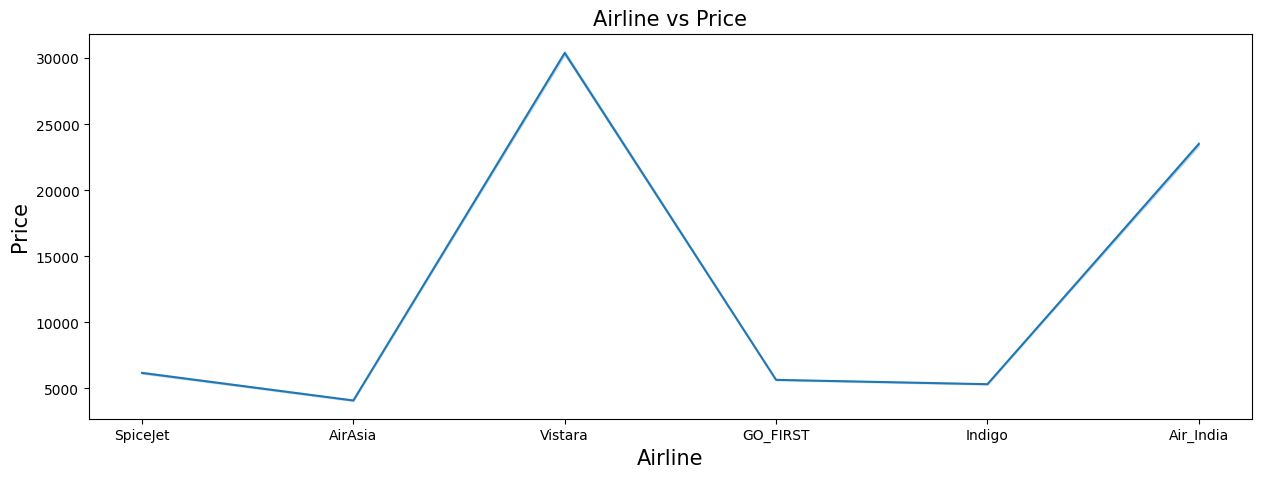

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airline vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

The above lineplot clearly shows that there is a variation in price with different airlines

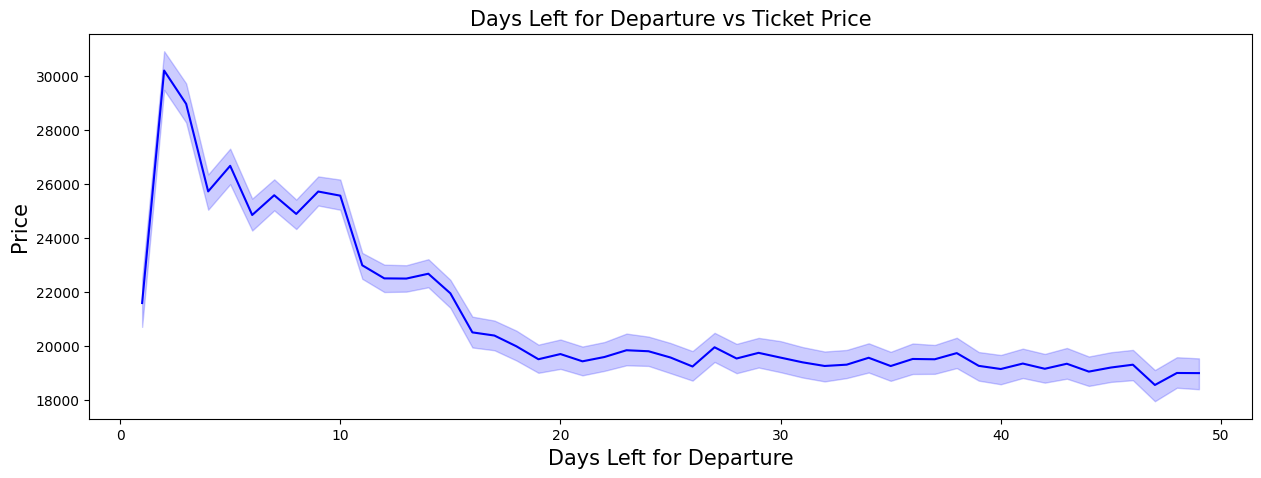

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df, x = 'days_left', y = 'price', color = 'blue')
plt.title('Days Left for Departure vs Ticket Price', fontsize = 15)
plt.xlabel('Days Left for Departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

The price of the ticket increases as the days left for the departure decreases

Text(0.5, 1.0, 'Price Range of Flights')

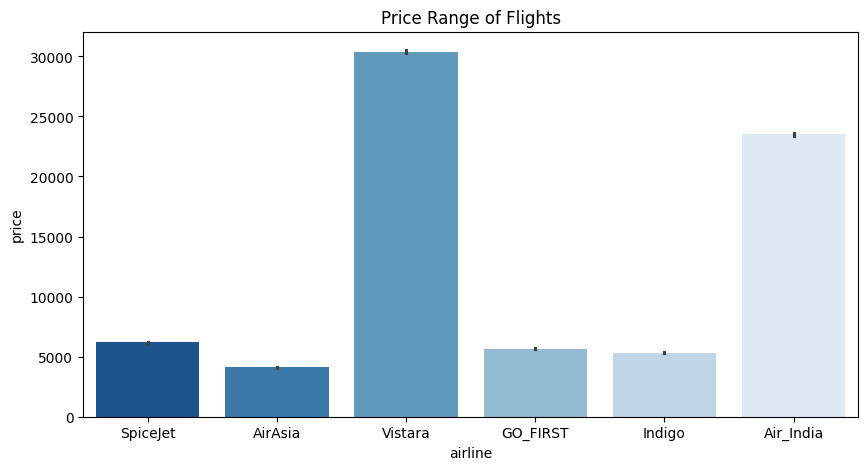

In [ ]:
#Price range of all the flights
plt.figure(figsize=(10, 5))
sns.barplot(x = 'airline', y = 'price', data = df, palette ="Blues_r")
plt.title("Price Range of Flights")

Text(0.5, 1.0, 'Price Range of Economy & Business Class')

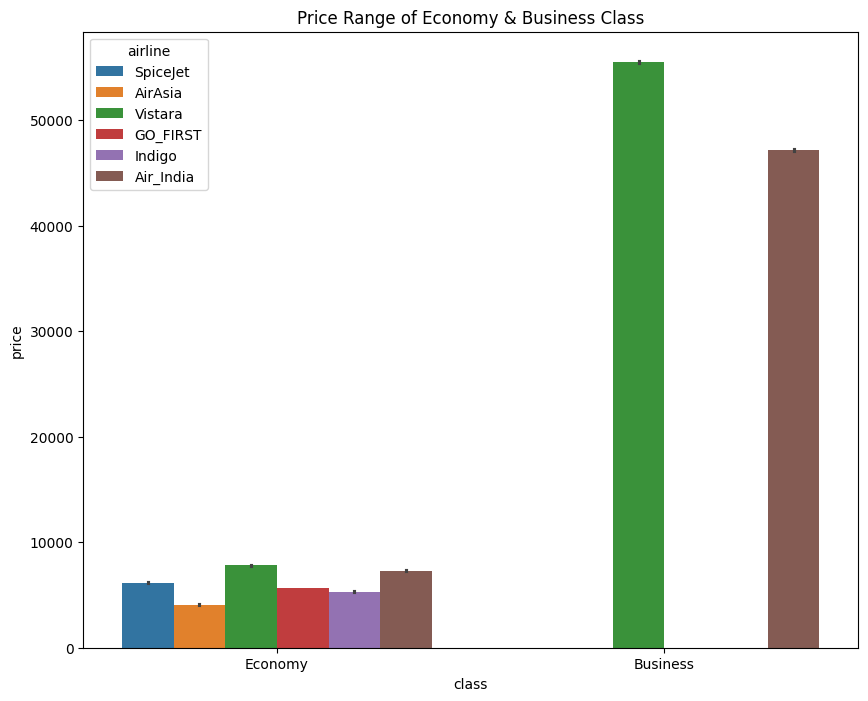

In [ ]:
#Range of price of all the flights of Economy and Business class
plt.figure(figsize=(10, 8))
sns.barplot(x = 'class', y = 'price', data = df, hue = 'airline')
plt.title("Price Range of Economy & Business Class")

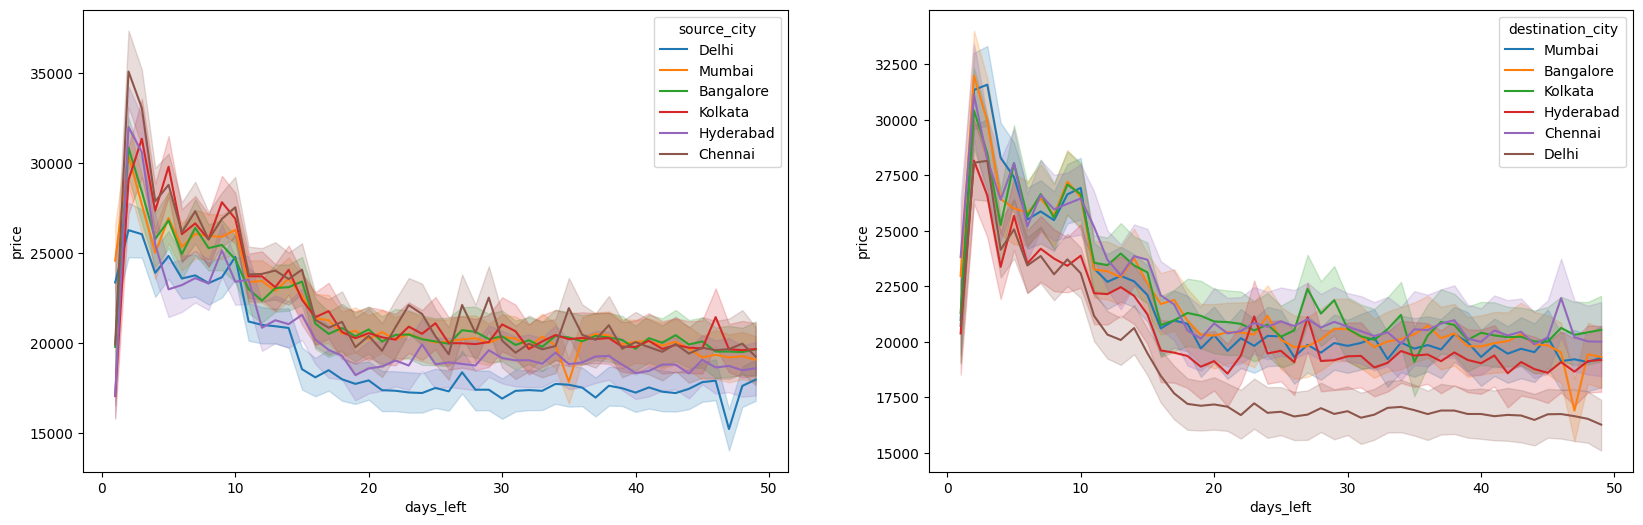

In [ ]:
#Range of price of flights with source and destination city according to the days left
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'source_city', ax = ax[0])
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'destination_city', ax = ax[1])
plt.show()

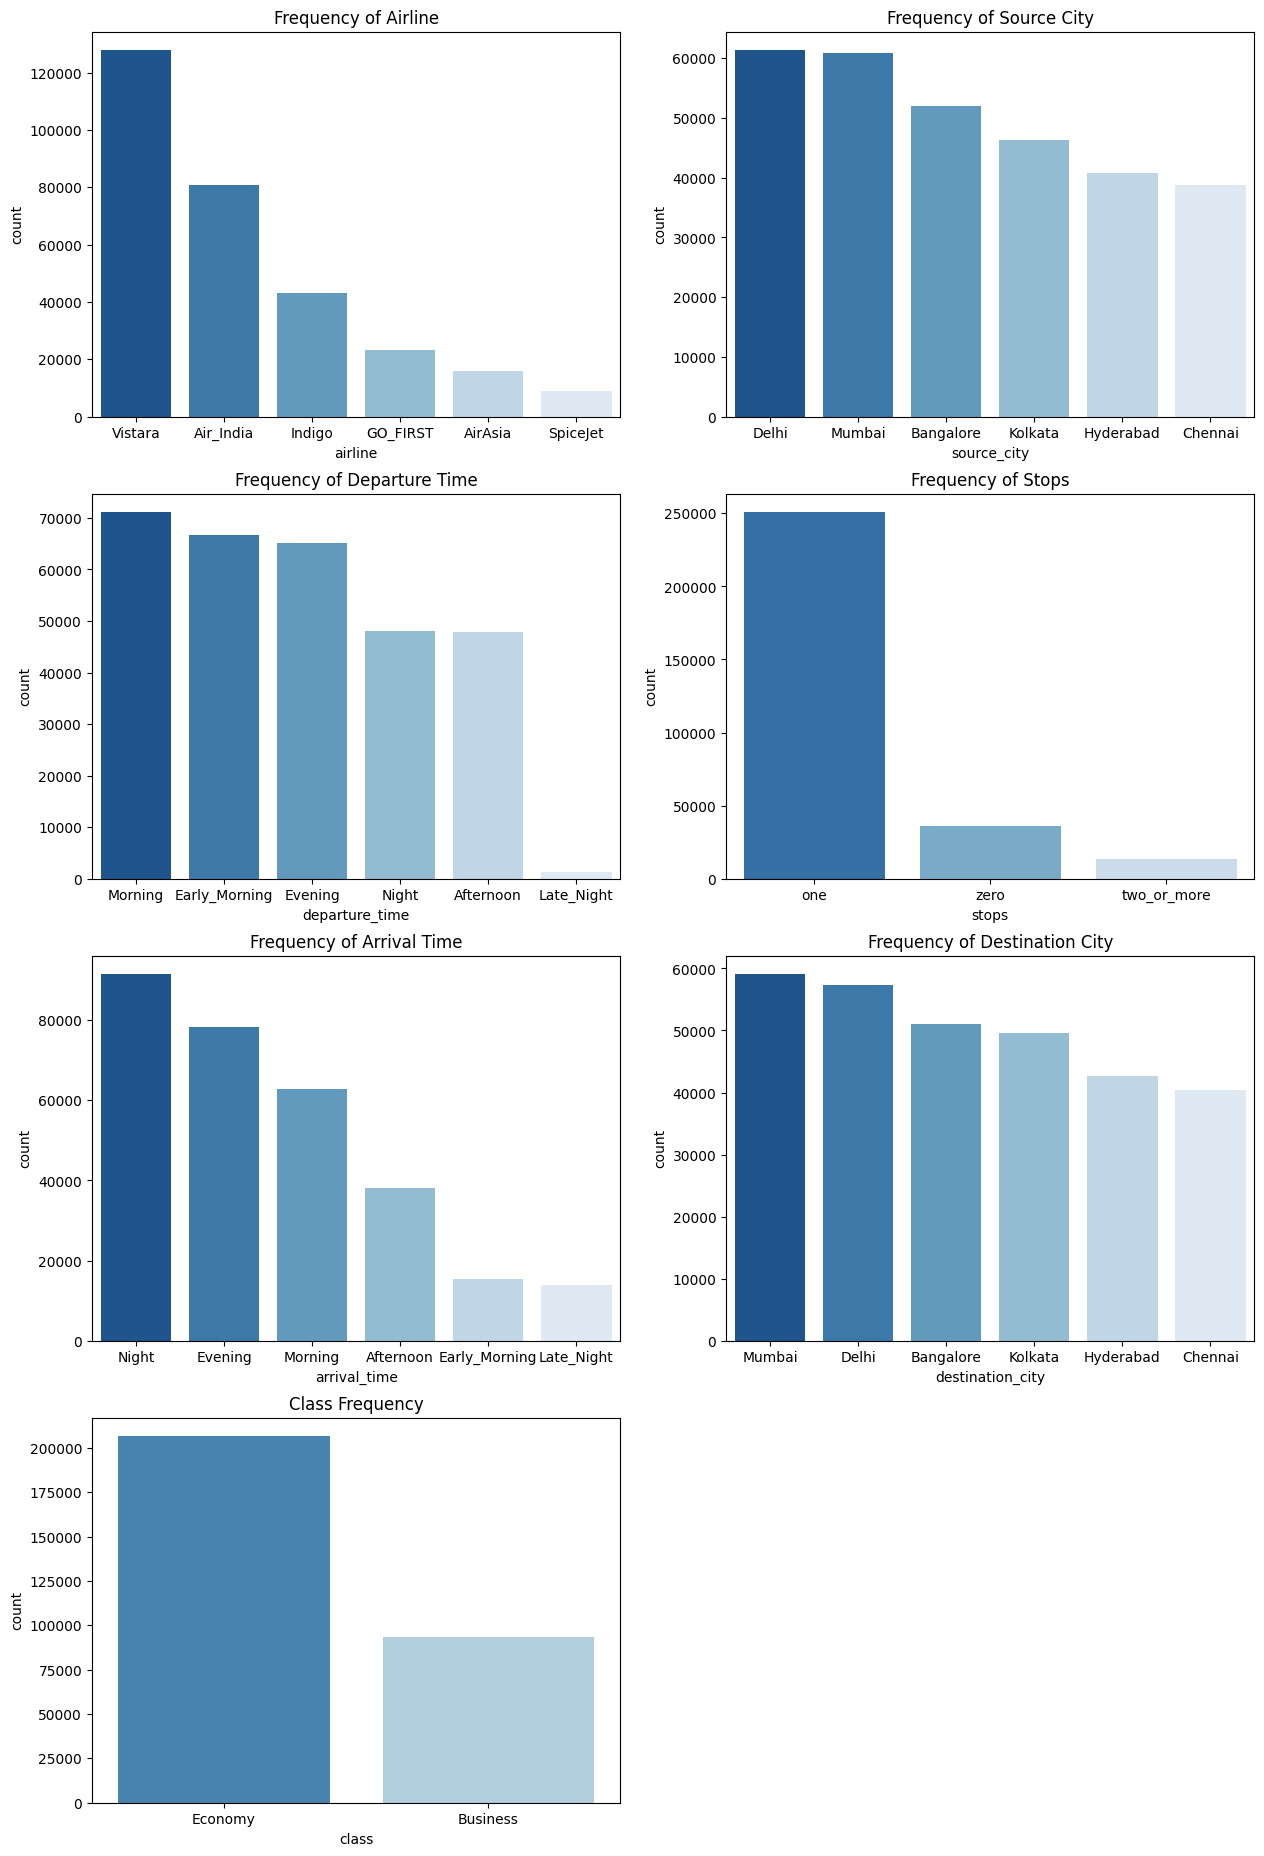

In [ ]:
#Visualization of categorical features with countplot
plt.figure(figsize=(15, 23))

plt.subplot(4, 2, 1)
sns.countplot(x = df['airline'], data = df, palette = "Blues_r",  order=df['airline'].value_counts().index)
plt.title('Frequency of Airline')

plt.subplot(4, 2, 2)
sns.countplot(x = df['source_city'], data = df, palette = "Blues_r",  order=df['source_city'].value_counts().index )
plt.title('Frequency of Source City')

plt.subplot(4, 2, 3)
sns.countplot(x = df['departure_time'], data = df, palette = "Blues_r",  order=df['departure_time'].value_counts().index)
plt.title('Frequency of Departure Time')

plt.subplot(4, 2, 4)
sns.countplot(x = df['stops'], data = df, palette = "Blues_r",  order=df['stops'].value_counts().index)
plt.title('Frequency of Stops')

plt.subplot(4, 2, 5)
sns.countplot(x = df['arrival_time'], data = df, palette = "Blues_r",  order=df['arrival_time'].value_counts().index)
plt.title('Frequency of Arrival Time')

plt.subplot(4, 2, 6)
sns.countplot(x = df['destination_city'], data = df, palette = "Blues_r",  order=df['destination_city'].value_counts().index)
plt.title('Frequency of Destination City')

plt.subplot(4, 2, 7)
sns.countplot(x = df['class'], data = df, palette = "Blues_r",  order=df['class'].value_counts().index)
plt.title('Class Frequency')

plt.show()

# Label Encoding for Categorical Features of the dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


# Plotting the correlation graph to see the correlation between features and dependent variable.

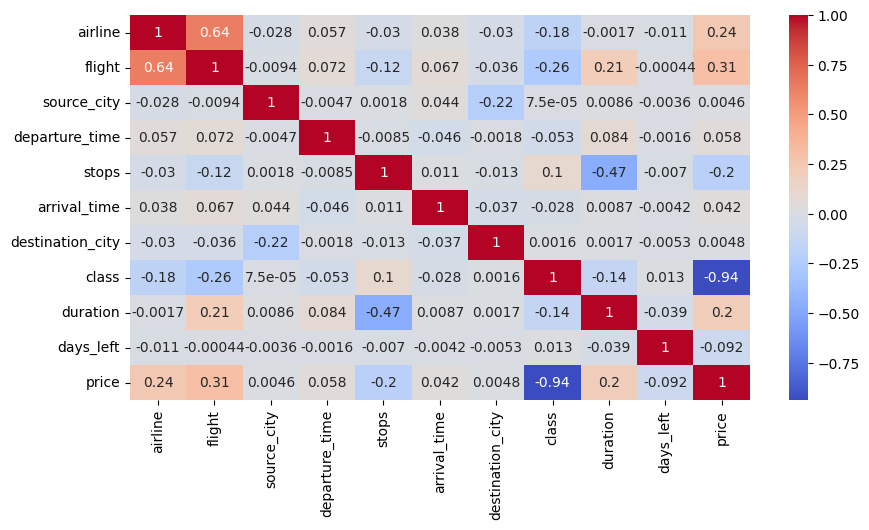

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Selecting the features using VIF. VIF should be less than 5.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

In [ ]:
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Features        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [ ]:
X.drop('flight', axis = 1, inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Applying standardization and implementing Linear Regression Model to predict the price of a flight

In [ ]:
#Independent variable
X = df.drop(columns=['price'])

#Dependent variable
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Spliting the data into train and test set into a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling the features of the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Building and training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the result on the test set
y_pred = lr.predict(X_test)

In [ ]:
#Check the difference
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_Value', 'Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4567.013416
1,64831.0,52844.339673
2,6195.0,7904.949552
3,60160.0,56121.015486
4,6578.0,6672.773495
...,...,...
60026,5026.0,5824.337078
60027,3001.0,371.004613
60028,6734.0,5843.835285
60029,5082.0,-1684.520514


# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9045747930770209

In [ ]:
from sklearn import metrics

In [ ]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

4622.187103361354

In [ ]:
metrics.mean_absolute_percentage_error(y_test, y_pred)

0.43444046400251307

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

49190002.62043739

In [ ]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

7013.558484851851

# Plotting the graph of actual and predicted price of flight

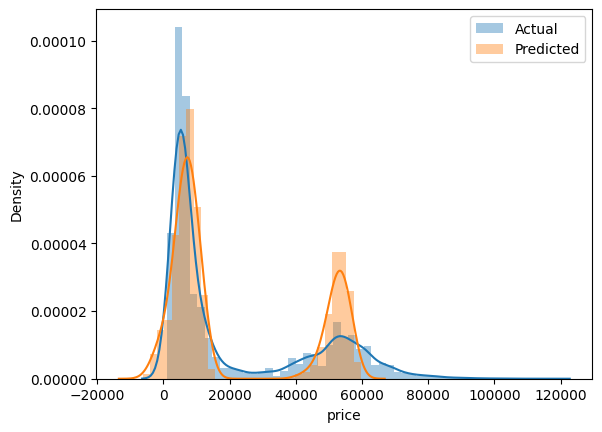

In [ ]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Training and predicting on the test set
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.9827003974645713

In [ ]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

893.8280332939094

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.05955353584561437

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

8917638.446800634

In [ ]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

2986.2415251952802

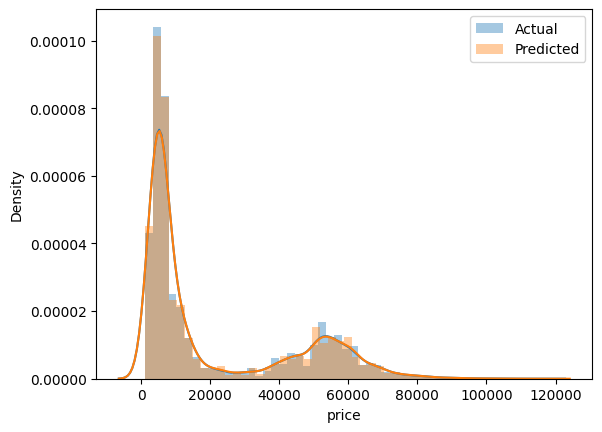

In [ ]:
#Plotting the graph of Actual and Predicted price of flight
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

Mean absolute percentage error is 5.9 percent and RMSE is 2986 which is less than the linear regression model

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Training and predicting on the test set
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [ ]:
#R2 score
r2_score(y_test, y_pred)

0.9895343027346066

In [ ]:
#Mean absolute error
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

864.5374325336852

In [ ]:
#Mean absolute percentage error
mean_absolute_percentage_error(y_test, y_pred)

0.0573203278930445

In [ ]:
#Mean squared error
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

5394881.420848494

In [ ]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

2322.688403735743

Mean absolute percentage error is 5.7 percent and RMSE is 2322 which is less than the linear regression and decision tree model

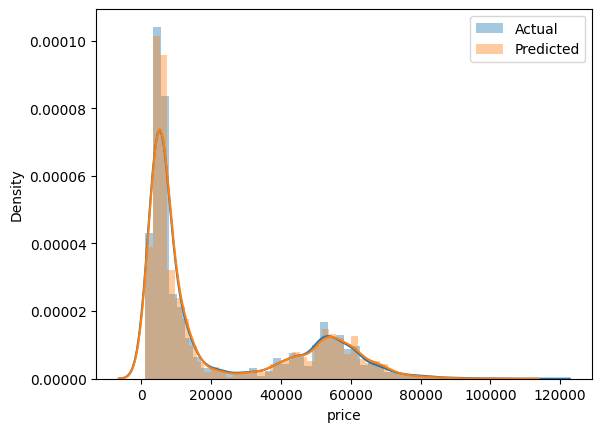

In [ ]:
#Plotting the graph of actual and predicted price of flight
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

**Impact & Recommendations**

**1) Optimized Pricing Strategies**: By understanding the relationship between various factors such as airlines, departure times, days left for departure, and ticket prices, airlines and travel agencies can implement dynamic pricing strategies. This can lead to better revenue management and increased profitability.

**2) Enhanced Customer Experience**: Insights derived from the analysis can help in offering personalized promotions and discounts to customers, improving customer satisfaction and loyalty. Transparent pricing information can also build trust among customers.

**3) Operational Efficiency**: Understanding the demand patterns and pricing dynamics allows airlines to optimize their operations, such as flight scheduling, capacity planning, and resource allocation, leading to more efficient use of resources and reduced operational costs.

**4) Competitive Advantage**: Airlines and travel agencies that leverage data analytics to understand customer preferences and market trends gain a competitive edge in the industry. They can adapt quickly to changes in the market and customer behavior, staying ahead of competitors.

**5) Data-Driven Decision Making**: The project promotes a culture of data-driven decision-making within the organization. Stakeholders can make informed decisions based on empirical evidence rather than intuition or assumptions, leading to more effective strategies and outcomes.

**6) Continuous Improvement**: Data analysis is an iterative process. The insights gained from this project can serve as a foundation for further analysis and experimentation, leading to continuous improvement in pricing strategies, customer service, and overall business performance.

In summary, the final impact of such a project extends beyond immediate financial gains. It encompasses improvements in customer satisfaction, operational efficiency, competitiveness, and organizational decision-making processes, ultimately contributing to the long-term success and sustainability of the business.




